In [3]:
import os 
os.chdir('../')
from PIL import Image 
import json 
import yaml 
import pandas as pd 

from torchvision import transforms 
from augmentation.romixgen import RoMixGen_Img,RoMixGen_Txt
import torch 
import numpy as np 
import matplotlib.pyplot as plt 

def img_show(img):
    img = torch.permute(img,dims=(1,2,0)).detach().numpy()
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    plt.imshow(img)
    plt.axis(False)
    plt.show()

In [10]:
config             = yaml.load(open('./configs/Retrieval_coco.yaml'),Loader=yaml.Loader)
image_dict         = json.load(open(config['image_dict_file']))
obj_bg_dict        = json.load(open(config['obj_bg_dict_file']))

transform_after_mix = transforms.Compose([
                                        transforms.RandomResizedCrop(config['image_res'],scale=(0.5, 1.0), interpolation=Image.BICUBIC),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
                                    ])




img_func = RoMixGen_Img(image_dict           = image_dict,
                        image_root           = config['aug_image_root'],
                        transform_after_mix  = transform_after_mix,
                        resize_ratio = 3)

txt_func = RoMixGen_Txt(image_caption       = image_dict)

In [45]:

obj_cat = txt_func.image_caption[obj_id]["max_obj_cat"] + txt_func.image_caption[obj_id]["max_obj_super_cat"]
bg_cat = txt_func.image_caption[bg_id]["max_obj_cat"] + txt_func.image_caption[bg_id]["max_obj_super_cat"]
#obj_caption = random.choice(self.image_caption[obj_id]["captions"])
bg_caption = np.random.choice(txt_func.image_caption[bg_id]["captions"])

new_caption = txt_func.replace_word(bg_caption, bg_cat, obj_cat)

In [55]:
image_dict[bg_id]

{'file_name': 'COCO_train2014_000000133200.jpg',
 'width': 640,
 'height': 368,
 'objects_count': 17,
 'max_obj_id': 592180,
 'max_obj_cat_id': 24,
 'max_obj_super_cat': ['animal', 'animals'],
 'max_obj_cat': ['zebra', 'zebras'],
 'max_obj_area': 1010.3388500000002,
 'max_obj_midpoint': [493.05, 220.745],
 'max_obj_bbox': [471.54, 200.16, 43.02, 41.17],
 'max_obj_area_portion': 0.004289821883491848,
 'captions': ['a bunch of animals that are standing in a field',
  'A herd of animals standing on a grassy plain.',
  'A bunch of different wild animals in a grassy field. ',
  'There are zebras and many other animals standing in the grass.',
  'A herd of zebra and cattle in a grassy area next to mountains.'],
 'obj_bg': 'bg'}

n A high mountain of snow with a cross country skier.


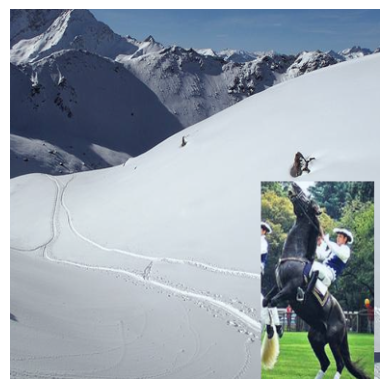

In [104]:
#obj_id = obj_bg_dict['obj'][49]
#bg_id = obj_bg_dict['bg'][382]
obj_id = '49'
bg_id = '382'
img = img_func(obj_id,bg_id)
txt = txt_func(obj_id,bg_id)
print(txt)
img_show(img)